In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image


In [34]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

from keras.datasets import mnist

from tensorflow.math import confusion_matrix

In [35]:
#loading data
(xTrain, yTrain), (xTest, yTest)  = mnist.load_data()

In [36]:
type(xTrain)

numpy.ndarray

In [37]:
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


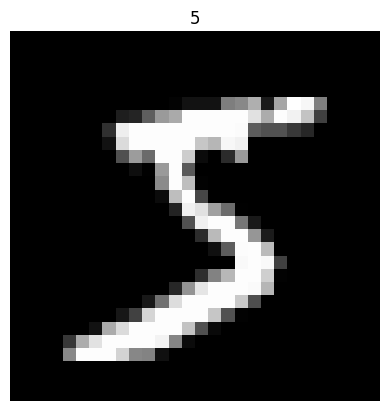

In [38]:
#display the image 

index = 0

plt.imshow(xTrain[index], cmap = 'gray')
plt.title(yTrain[index])

plt.axis('off')

plt.show()

In [39]:
#Unique values in y
np.unique(yTrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [40]:
np.unique(yTest)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [41]:
#Scaling the values - normalization

xTrain = xTrain / 255.0
xTest = xTest / 255.0

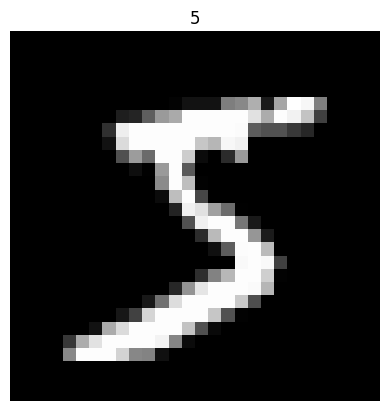

In [42]:
#display the image 

index = 0

plt.imshow(xTrain[index], cmap = 'gray')
plt.title(yTrain[index])

plt.axis('off')

plt.show()

In [43]:
#Building neural network

model = keras.Sequential([
    keras.Input(shape = (28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [44]:
#Compling the neural network

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [45]:
#Training the nn

histroy = model.fit(xTrain, yTrain, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8521 - loss: 0.5179
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9574 - loss: 0.1465
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9685 - loss: 0.1064
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9745 - loss: 0.0847
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9790 - loss: 0.0695
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9824 - loss: 0.0577
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9843 - loss: 0.0503
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9874 - loss: 0.0419
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9890 - loss: 0.0351
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9907 - loss: 0.0322


In [ ]:
#Accuracy on Train data - 0.9907

#Accuracy on Test data

loss, accuracy = model.evaluate(xTest, yTest)
accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.9682 - loss: 0.1287


0.9714000225067139

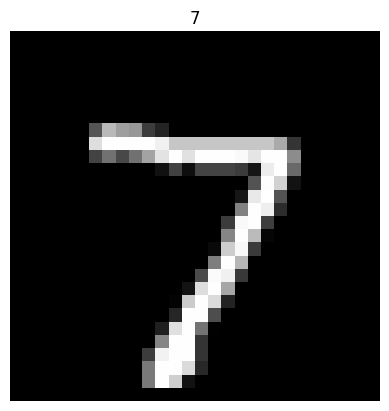

In [49]:
plt.imshow(xTest[0], cmap = 'gray')
plt.title(yTest[0])

plt.axis('off')
plt.show()

In [48]:
prediction = model.predict(xTest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step


In [51]:
#Converting Prediction probability to labels

predictionLabel = [np.argmax(i) for i in prediction]
print(predictionLabel)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 3, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 6, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [52]:
#Confusion Matrix

conf_matrix = confusion_matrix(yTest, predictionLabel)
print(conf_matrix)

tf.Tensor(
[[ 953    0    4    2    1    3   10    2    1    4]
 [   0 1118    4    2    0    1    3    3    3    1]
 [   3    0 1014    4    0    0    3    5    2    1]
 [   0    0    8  987    0    8    0    5    1    1]
 [   0    1    4    0  958    1    8    3    2    5]
 [   1    0    0   12    0  870    4    2    2    1]
 [   1    3    3    1    2    4  942    0    2    0]
 [   1    1   10    2    0    0    0 1009    1    4]
 [   2    1   13   28    2   14    6    9  895    4]
 [   1    2    1   11   15    4    2    8    0  965]], shape=(10, 10), dtype=int32)


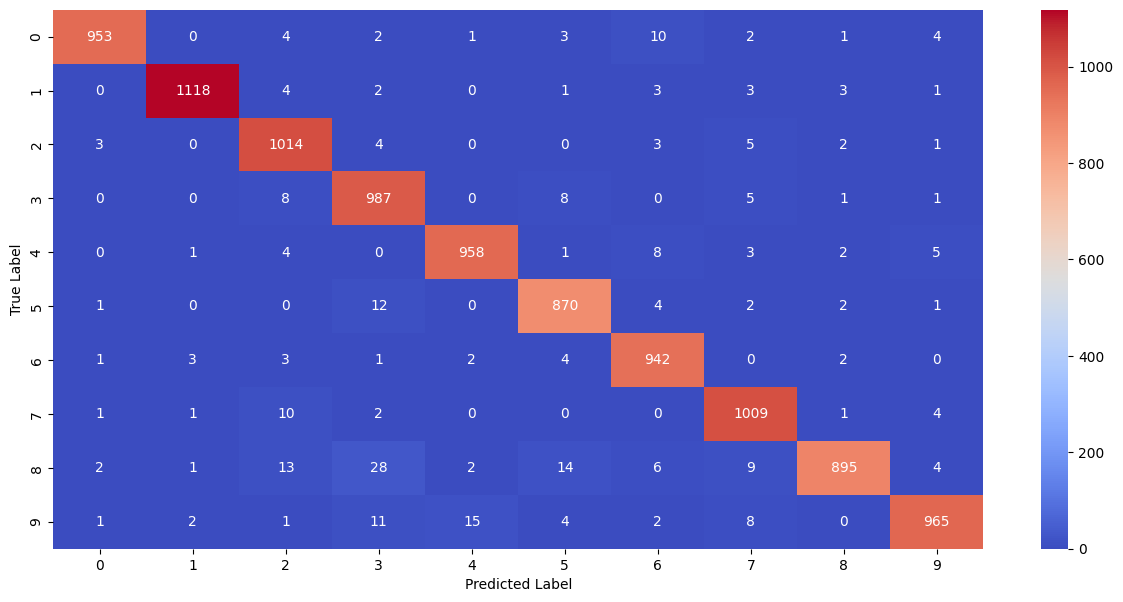

In [54]:
plt.figure(figsize=(15, 7))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = 'coolwarm')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
#Predictive System

input_path = "2_MNIST_HandwrittenDigit_Classification_Input.png"

inputImg = cv2.imread(input_path)

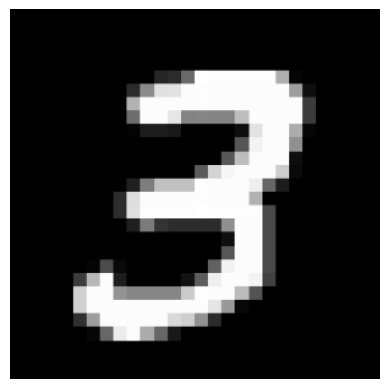

In [62]:
plt.imshow(inputImg)
plt.axis('off')

plt.show()

In [63]:
inputImg.shape

(318, 318, 3)

In [64]:
#Convert RGB to Gray
grayImg = cv2.cvtColor(inputImg, cv2.COLOR_RGB2GRAY)
grayImg.shape

(318, 318)

In [68]:
#Reszie
inputImg = cv2.resize(grayImg, (28, 28))
inputImg = inputImg / 255.0
inputImg.shape

(28, 28)

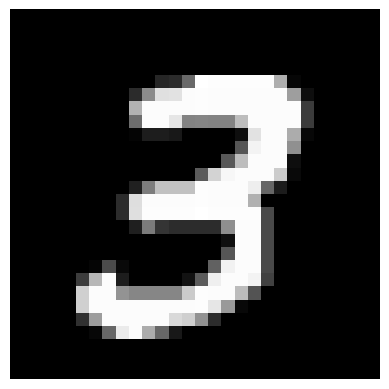

In [69]:
plt.imshow(inputImg, cmap = 'gray')
plt.axis('off')

plt.show()

In [70]:
inputImg = np.reshape(inputImg, [1, 28, 28])
inputImg.shape

(1, 28, 28)

In [71]:
prediction = model.predict(inputImg)

predictionLabel = np.argmax(prediction)

print(predictionLabel)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
3
